In [18]:
from statsbombpy import sb
import pandas as pd
import numpy as np
import warnings
import os
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from mplsoccer import Bumpy, FontManager, add_image
font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/'
                          'main/src/hinted/Roboto-Regular.ttf')


In [3]:
df=pd.read_excel(fr"C:\Users\vidal\Desktop\escala25.xlsx")


,Equipo,Posición,Jugador,Precio
0,ALAVÉS,PORTERO,ANTONIO SIVERA,13
1,ALAVÉS,PORTERO,JESÚS OWONO,11
2,ALAVÉS,PORTERO,ADRIÁN RODRÍGUEZ,11
3,ALAVÉS,DEFENSA,MANU SÁNCHEZ,12
4,ALAVÉS,DEFENSA,ALEKSANDAR SEDLAR,13
...,...,...,...,...
571,VILLARREAL,DELANTERO,THIERNO BARRY,18
572,VILLARREAL,DELANTERO,NICOLAS PÉPÉ,18
573,VILLARREAL,DELANTERO,AYOZE PÉREZ,19
574,VILLARREAL,DELANTERO,PAU CABANES DE LA TORRE,14


In [4]:
media_precio_por_equipo = df.groupby('Equipo')['Precio'].mean().sort_values(ascending=True)




In [5]:
media_precio_por_equipo

Equipo
LEGANÉS               11.192308
ESPANYOL              11.500000
ALAVÉS                11.629630
MALLORCA              11.862069
GETAFE                12.200000
OSASUNA               12.444444
REAL VALLADOLID       12.750000
RAYO VALLECANO        12.928571
CELTA DE VIGO         13.400000
ATHLETIC CLUB         13.448276
VALENCIA              13.696970
SEVILLA               13.741935
GIRONA                14.160000
BETIS                 14.620690
VILLARREAL            15.600000
ATLÉTICO DE MADRID    18.310345
BARCELONA             21.580645
REAL MADRID           23.423077
Name: Precio, dtype: float64

In [6]:
media_precio_por_equipo_posicion = df[df['Posición'].isin(['DEFENSA','MEDIOCENTRO', 'DELANTERO'])].groupby(['Equipo', 'Posición'])['Precio'].mean()


In [7]:
media_precio_por_equipo_posicion

Equipo              Posición   
ALAVÉS              DEFENSA        11.500000
                    DELANTERO      11.454545
                    MEDIOCENTRO    12.200000
ATHLETIC CLUB       DEFENSA        12.400000
                    DELANTERO      15.000000
                    MEDIOCENTRO    12.714286
ATLÉTICO DE MADRID  DEFENSA        17.100000
                    DELANTERO      24.000000
                    MEDIOCENTRO    17.300000
BARCELONA           DEFENSA        19.090909
                    DELANTERO      26.857143
                    MEDIOCENTRO    21.666667
BETIS               DEFENSA        13.700000
                    DELANTERO      15.571429
                    MEDIOCENTRO    15.111111
CELTA DE VIGO       DEFENSA        12.888889
                    DELANTERO      16.285714
                    MEDIOCENTRO    13.000000
ESPANYOL            DEFENSA        11.888889
                    DELANTERO      11.428571
                    MEDIOCENTRO    11.000000
GETAFE              DEF

In [8]:
general_price_mean = media_precio_por_equipo.sort_values(ascending=False).to_frame(name="Media Precio General")
defense_price_mean = media_precio_por_equipo_posicion.xs("DEFENSA", level="Posición", drop_level=False).sort_values(ascending=False).to_frame(name="Media Precio Defensa")
forward_price_mean = media_precio_por_equipo_posicion.xs("DELANTERO", level="Posición", drop_level=False).sort_values(ascending=False).to_frame(name="Media Precio Delantero")
MEDIOS_price_mean = media_precio_por_equipo_posicion.xs("MEDIOCENTRO", level="Posición", drop_level=False).sort_values(ascending=False).to_frame(name="Media Precio Mediocentro")

# Crear un archivo Excel con cada ranking en una hoja distinta
file_path = 'rankings_precio_equipos.xlsx'
with pd.ExcelWriter(file_path) as writer:
    general_price_mean.to_excel(writer, sheet_name='General')
    defense_price_mean.to_excel(writer, sheet_name='Defensa')
    defense_price_mean.to_excel(writer, sheet_name='Mediocentros')
    forward_price_mean.to_excel(writer, sheet_name='Delantero')

file_path

'rankings_precio_equipos.xlsx'

In [10]:
import numpy as np

In [20]:
data = {
    'Equipo': ['REAL MADRID', 'BARCELONA', 'ATLÉTICO DE MADRID', 'VILLARREAL', 'BETIS', 'GIRONA', 'SEVILLA', 'VALENCIA', 
               'ATHLETIC CLUB', 'CELTA DE VIGO', 'RAYO VALLECANO', 'REAL VALLADOLID', 'OSASUNA', 'GETAFE', 
               'MALLORCA', 'ALAVÉS', 'ESPANYOL', 'LEGANÉS'],
    'Media Precio General': [23.42, 21.58, 18.31, 15.6, 14.62, 14.16, 13.74, 13.7, 13.45, 13.4, 12.93, 12.75, 12.44, 
                             12.2, 11.86, 11.63, 11.5, 11.19],
    'Puntos en Liga': [27, 33, 26, 24, 20, 18, 15, 7, 20, 17, 16, 9, 21, 10, 18, 13, 10, 14],
    'Partidos Jugados': [12, 13, 13, 12, 13, 13, 13, 13, 13, 13, 12, 13, 13, 13, 13, 13, 12, 11]
}
df = pd.DataFrame(data)


df['Puntos Proyectados'] = (df['Puntos en Liga'] / df['Partidos Jugados']) * 38




In [69]:
highlight_teams = ["REAL MADRID", "BARCELONA", "ATLÉTICO DE MADRID", "BETIS", "GIRONA", "ATHLETIC CLUB"]



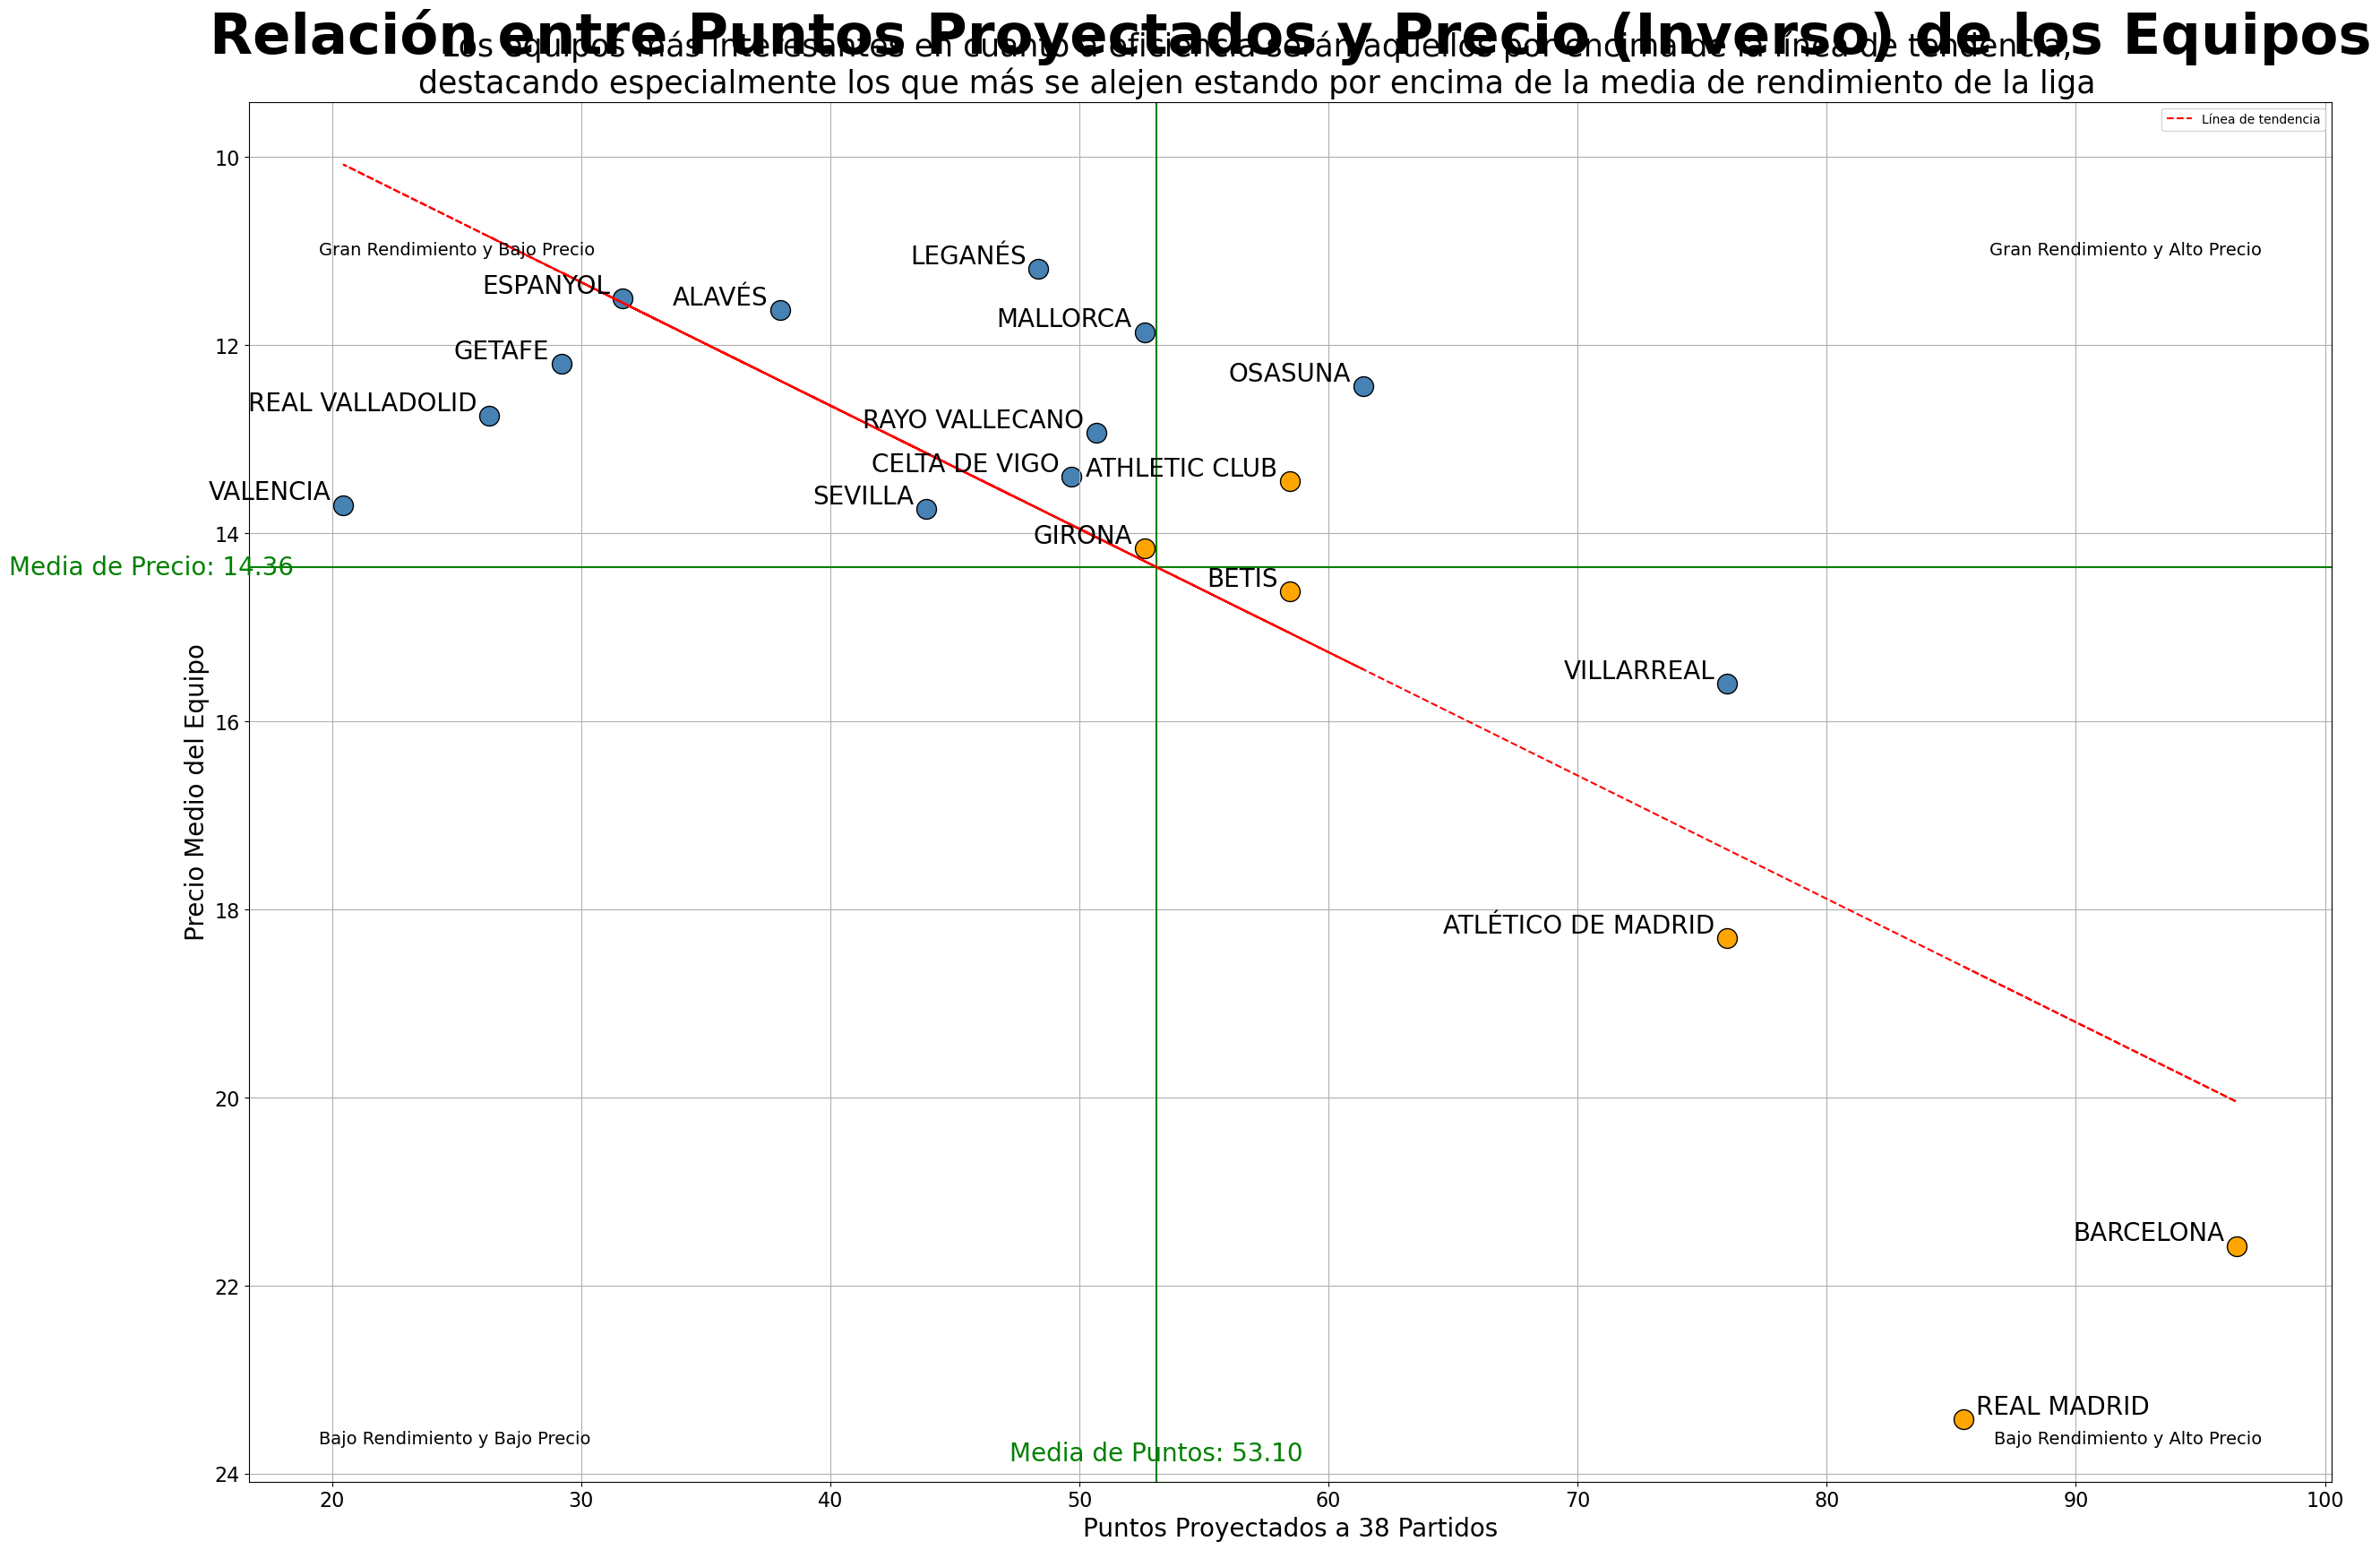

In [73]:
# Crear el scatter plot con el subtítulo solicitado

plt.figure(figsize=(30, 20))
for i, point in df.iterrows():
    color = 'orange' if point['Equipo'] in highlight_teams else 'steelblue'
    plt.scatter(point['Puntos Proyectados'], point['Media Precio General'], color=color, edgecolors='black', s=250)  # Puntos grandes
    text_offset_x = 0.5  # Ajuste de la posición del texto
    text_offset_y = 0.0
    ha_text = 'left' if point['Equipo'] == "REAL MADRID" else 'right'
    plt.text(point['Puntos Proyectados'] + (text_offset_x if ha_text == 'left' else -text_offset_x),
             point['Media Precio General'] + text_offset_y, f"{point['Equipo']}",
             fontsize=20, ha=ha_text, va='bottom')

# Añadir la línea de media de puntos y precio
precio_media = np.mean(df['Media Precio General'])
puntos_proyectados_media = np.mean(df['Puntos Proyectados'])
plt.axhline(y=precio_media, color='green', linestyle='-', linewidth=1.5)
plt.text(np.min(df['Puntos Proyectados']) - 2, precio_media, f'Media de Precio: {precio_media:.2f}',
         fontsize=20, color='green', ha='right', va='center')
plt.axvline(x=puntos_proyectados_media, color='green', linestyle='-', linewidth=1.5)
plt.text(puntos_proyectados_media, np.max(df['Media Precio General']) + 0.5, f'Media de Puntos: {puntos_proyectados_media:.2f}',
         fontsize=20, color='green', ha='center', va='bottom')

# Añadir la línea de tendencia
z = np.polyfit(df['Puntos Proyectados'], df['Media Precio General'], 1)
p = np.poly1d(z)
plt.plot(df['Puntos Proyectados'], p(df['Puntos Proyectados']), "r--", label='Línea de tendencia')

# Invertir el eje Y para que menor precio esté arriba
plt.gca().invert_yaxis()

# Añadir texto en las esquinas y cuadrantes
plt.text(np.min(df['Puntos Proyectados'])-1, np.min(df['Media Precio General']) - 0.3, 'Gran Rendimiento y Bajo Precio',
         fontsize=14, ha='left', va='top')
plt.text(np.max(df['Puntos Proyectados'])+1, np.min(df['Media Precio General']) - 0.3, 'Gran Rendimiento y Alto Precio',
         fontsize=14, ha='right', va='top')
plt.text(np.min(df['Puntos Proyectados'])-1, np.max(df['Media Precio General']) + 0.3, 'Bajo Rendimiento y Bajo Precio',
         fontsize=14, ha='left', va='bottom')
plt.text(np.max(df['Puntos Proyectados'])+1, np.max(df['Media Precio General']) + 0.3, 'Bajo Rendimiento y Alto Precio',
         fontsize=14, ha='right', va='bottom')

# Títulos, subtítulo y etiquetas
plt.title('Relación entre Puntos Proyectados y Precio (Inverso) de los Equipos', fontsize=45, y=1.03, fontweight='bold')
plt.suptitle('Los equipos más interesantes en cuanto a eficiencia serán aquellos por encima de la línea de tendencia,\n'
             'destacando especialmente los que más se alejen estando por encima de la media de rendimiento de la liga',
             fontsize=25, y=0.92)
plt.xlabel('Puntos Proyectados a 38 Partidos', fontsize=20, y=-1.03)
plt.ylabel('Precio Medio del Equipo', fontsize=20, x=-1.03)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.legend()

plt.show()


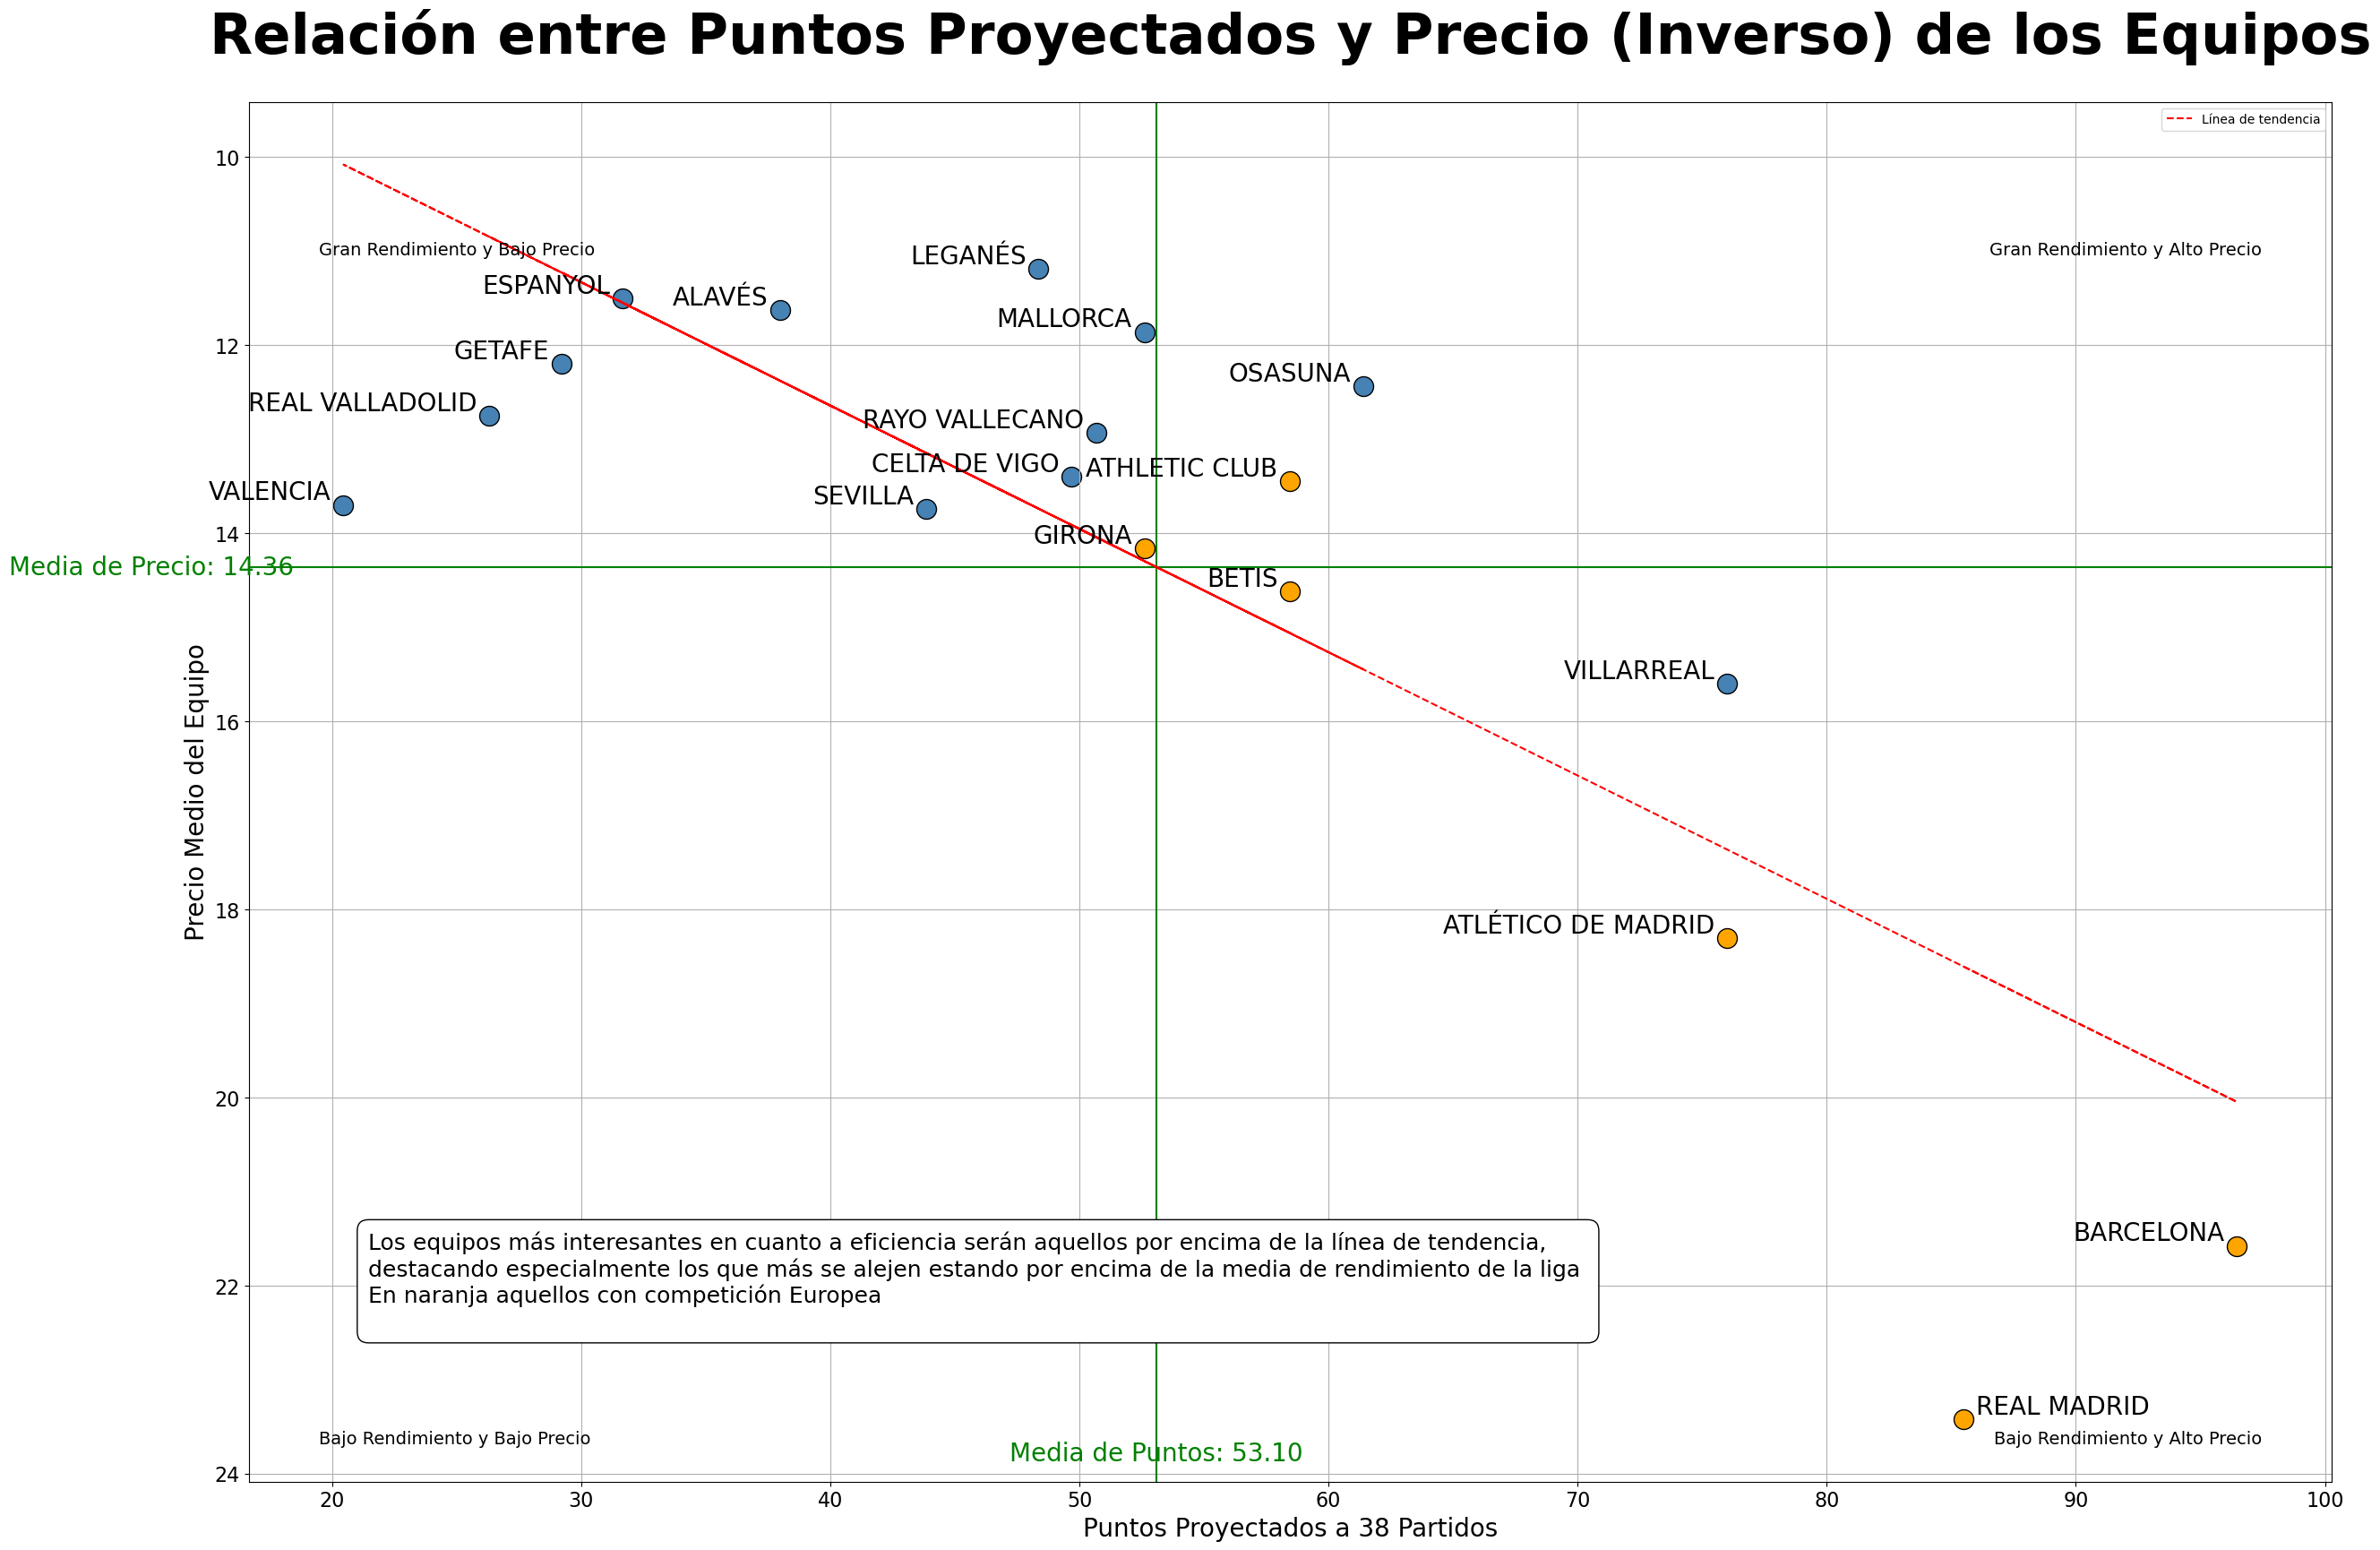

In [80]:
# Crear el scatter plot con el cuadro de texto en el cuadrante inferior izquierdo

plt.figure(figsize=(30, 20))
for i, point in df.iterrows():
    color = 'orange' if point['Equipo'] in highlight_teams else 'steelblue'
    plt.scatter(point['Puntos Proyectados'], point['Media Precio General'], color=color, edgecolors='black', s=250)  # Puntos grandes
    text_offset_x = 0.5  # Ajuste de la posición del texto
    text_offset_y = 0.0
    ha_text = 'left' if point['Equipo'] == "REAL MADRID" else 'right'
    plt.text(point['Puntos Proyectados'] + (text_offset_x if ha_text == 'left' else -text_offset_x),
             point['Media Precio General'] + text_offset_y, f"{point['Equipo']}",
             fontsize=20, ha=ha_text, va='bottom')

# Añadir la línea de media de puntos y precio
precio_media = np.mean(df['Media Precio General'])
puntos_proyectados_media = np.mean(df['Puntos Proyectados'])
plt.axhline(y=precio_media, color='green', linestyle='-', linewidth=1.5)
plt.text(np.min(df['Puntos Proyectados']) - 2, precio_media, f'Media de Precio: {precio_media:.2f}',
         fontsize=20, color='green', ha='right', va='center')
plt.axvline(x=puntos_proyectados_media, color='green', linestyle='-', linewidth=1.5)
plt.text(puntos_proyectados_media, np.max(df['Media Precio General']) + 0.5, f'Media de Puntos: {puntos_proyectados_media:.2f}',
         fontsize=20, color='green', ha='center', va='bottom')

# Añadir la línea de tendencia
z = np.polyfit(df['Puntos Proyectados'], df['Media Precio General'], 1)
p = np.poly1d(z)
plt.plot(df['Puntos Proyectados'], p(df['Puntos Proyectados']), "r--", label='Línea de tendencia')

# Invertir el eje Y para que menor precio esté arriba
plt.gca().invert_yaxis()

# Añadir texto en las esquinas y cuadrantes
plt.text(np.min(df['Puntos Proyectados'])-1, np.min(df['Media Precio General']) - 0.3, 'Gran Rendimiento y Bajo Precio',
         fontsize=14, ha='left', va='top')
plt.text(np.max(df['Puntos Proyectados'])+1, np.min(df['Media Precio General']) - 0.3, 'Gran Rendimiento y Alto Precio',
         fontsize=14, ha='right', va='top')
plt.text(np.min(df['Puntos Proyectados'])-1, np.max(df['Media Precio General']) + 0.3, 'Bajo Rendimiento y Bajo Precio',
         fontsize=14, ha='left', va='bottom')
plt.text(np.max(df['Puntos Proyectados'])+1, np.max(df['Media Precio General']) + 0.3, 'Bajo Rendimiento y Alto Precio',
         fontsize=14, ha='right', va='bottom')

# Cuadro de texto en el cuadrante inferior izquierdo
textstr = ('Los equipos más interesantes en cuanto a eficiencia serán aquellos por encima de la línea de tendencia,\n'
           'destacando especialmente los que más se alejen estando por encima de la media de rendimiento de la liga \n'
           'En naranja aquellos con competición Europea \n ')
plt.text(np.min(df['Puntos Proyectados']) +1 , np.max(df['Media Precio General'])-2, textstr,
         fontsize=18, ha='left', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Títulos y etiquetas
plt.title('Relación entre Puntos Proyectados y Precio (Inverso) de los Equipos', fontsize=45, y=1.03, fontweight='bold')
plt.xlabel('Puntos Proyectados a 38 Partidos', fontsize=20, y=-1.03)
plt.ylabel('Precio Medio del Equipo', fontsize=20, x=-1.03)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.legend()

plt.show()

